# Load dataset and Preprocessing

In [1]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('train.csv')
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [2]:
#Print the data shape (instances and attributes)
df.shape

(54808, 14)

In [3]:
#Print the data info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [4]:
#print target classes and its count
df['is_promoted'].value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

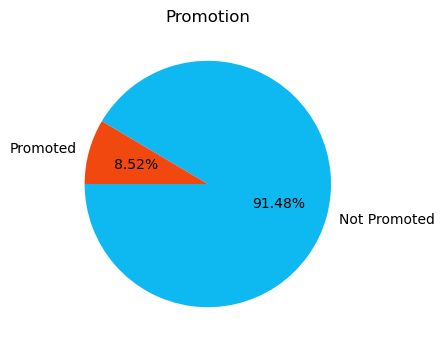

In [5]:
fig, ax = plt.subplots(figsize = (4, 4))

ax.pie(df.is_promoted.value_counts(), labels = ["Not Promoted", "Promoted"], 
       autopct = '%1.2f%%', startangle = 180, colors = ["#0EB8F1", "#F1480F"])

ax.set_title("Promotion")
plt.show()

In [6]:
column_names=df.columns
print(column_names)

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')


# Null check

In [7]:
#handling the null values
df.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [8]:
df.dropna(subset=['education', 'previous_year_rating'], inplace=True)

In [9]:
df.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [10]:
#check the dataset after null value removal
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48660 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           48660 non-null  int64  
 1   department            48660 non-null  object 
 2   region                48660 non-null  object 
 3   education             48660 non-null  object 
 4   gender                48660 non-null  object 
 5   recruitment_channel   48660 non-null  object 
 6   no_of_trainings       48660 non-null  int64  
 7   age                   48660 non-null  int64  
 8   previous_year_rating  48660 non-null  float64
 9   length_of_service     48660 non-null  int64  
 10  KPIs_met >80%         48660 non-null  int64  
 11  awards_won?           48660 non-null  int64  
 12  avg_training_score    48660 non-null  int64  
 13  is_promoted           48660 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.6+ MB


(48660, 14)

# Duplicate 

In [11]:
#Check for duplicates
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
54802    False
54803    False
54804    False
54805    False
54807    False
Length: 48660, dtype: bool

# Encoding

In [12]:
#Label Encode the columns which are non numeric
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

df['department'] = label_encoder.fit_transform(df['department'])
df['gender'] = label_encoder.fit_transform(df['gender'])
df['region'] = label_encoder.fit_transform(df['region'])
df['education'] = label_encoder.fit_transform(df['education'])
df['recruitment_channel'] = label_encoder.fit_transform(df['recruitment_channel'])

In [13]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,7,31,2,0,2,1,35,5.0,8,1,0,49,0
1,65141,4,14,0,1,0,1,30,5.0,4,0,0,60,0
2,7513,7,10,0,1,2,1,34,3.0,7,0,0,50,0
3,2542,7,15,0,1,0,2,39,1.0,10,0,0,50,0
4,48945,8,18,0,1,0,1,45,3.0,2,0,0,73,0


In [14]:
df.describe()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,48660.000000,48660.000000,48660.000000,48660.000000,48660.000000,48660.000000,48660.000000,48660.000000,48660.000000,48660.00000,48660.000000,48660.00000,48660.000000,48660.000000
mean,39169.271681,4.963913,15.397801,0.617633,0.695684,0.868598,1.251993,35.589437,3.337526,6.31157,0.356473,0.02314,63.603309,0.086971
std,22630.461554,2.484464,8.821645,0.918913,0.460122,0.980710,0.604994,7.534571,1.257922,4.20476,0.478962,0.15035,13.273502,0.281795
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,20.000000,1.000000,1.00000,0.000000,0.00000,39.000000,0.000000
25%,19563.500000,4.000000,11.000000,0.000000,0.000000,0.000000,1.000000,30.000000,3.000000,3.00000,0.000000,0.00000,51.000000,0.000000
50%,39154.000000,5.000000,14.000000,0.000000,1.000000,0.000000,1.000000,34.000000,3.000000,5.00000,0.000000,0.00000,60.000000,0.000000
75%,58788.250000,7.000000,21.000000,2.000000,1.000000,2.000000,1.000000,39.000000,4.000000,8.00000,1.000000,0.00000,76.000000,0.000000
max,78298.000000,8.000000,33.000000,2.000000,1.000000,2.000000,10.000000,60.000000,5.000000,37.00000,1.000000,1.00000,99.000000,1.000000


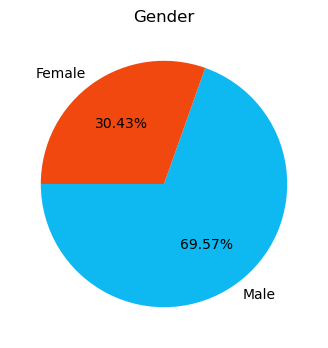

In [15]:
fig, ax = plt.subplots(figsize = (4, 4))

ax.pie(df.gender.value_counts(), labels = ["Male", "Female"], 
       autopct = '%1.2f%%', startangle = 180, colors = ["#0EB8F1", "#F1480F"])

ax.set_title("Gender")
plt.show()

# Department

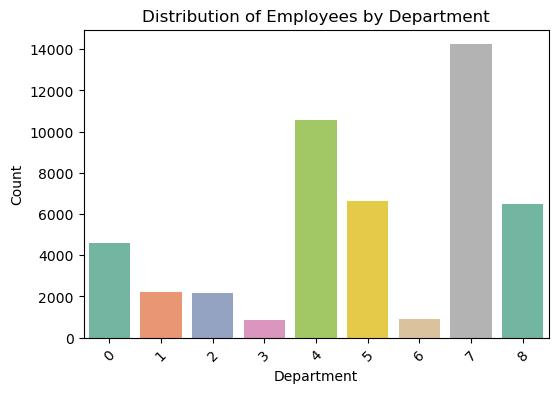

In [16]:
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='department', palette='Set2')
plt.xticks(rotation=45)
plt.xlabel('Department')
plt.ylabel('Count')
plt.title('Distribution of Employees by Department')
plt.show()


# Age

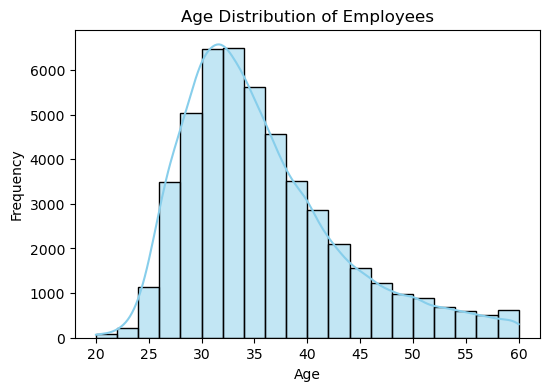

In [17]:
plt.figure(figsize=(6, 4))
sns.histplot(df['age'], bins=20, kde=True, color='skyblue')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution of Employees')
plt.show()


# Region

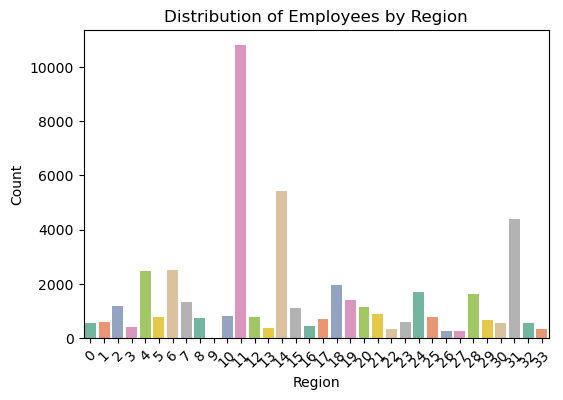

In [18]:
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='region', palette='Set2')
plt.xticks(rotation=45)
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Distribution of Employees by Region')
plt.show()


# Education

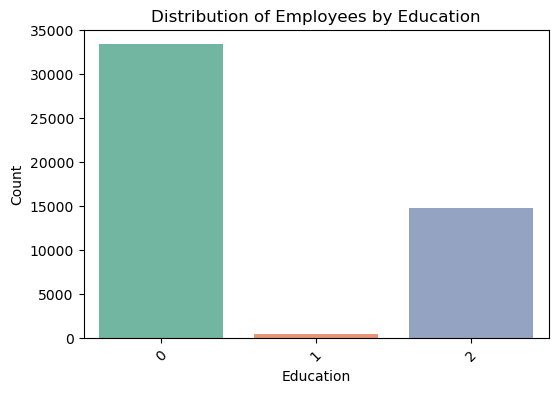

In [19]:
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='education', palette='Set2')
plt.xticks(rotation=45)
plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Distribution of Employees by Education')
plt.show()

# Recruitment channel

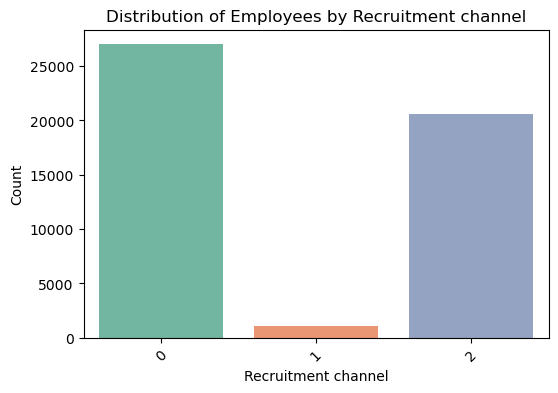

In [20]:
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='recruitment_channel', palette='Set2')
plt.xticks(rotation=45)
plt.xlabel('Recruitment channel')
plt.ylabel('Count')
plt.title('Distribution of Employees by Recruitment channel')
plt.show()

# Previous year rating

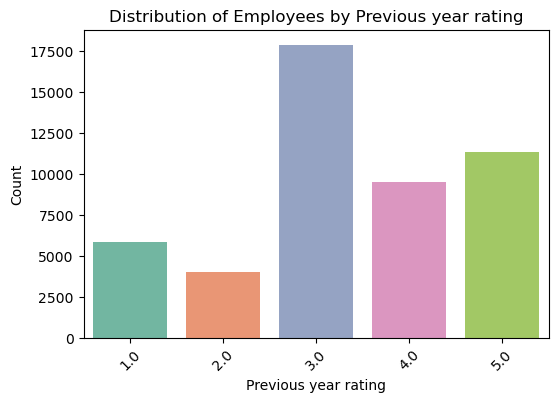

In [21]:
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='previous_year_rating', palette='Set2')
plt.xticks(rotation=45)
plt.xlabel('Previous year rating')
plt.ylabel('Count')
plt.title('Distribution of Employees by Previous year rating')
plt.show()

# Awards won

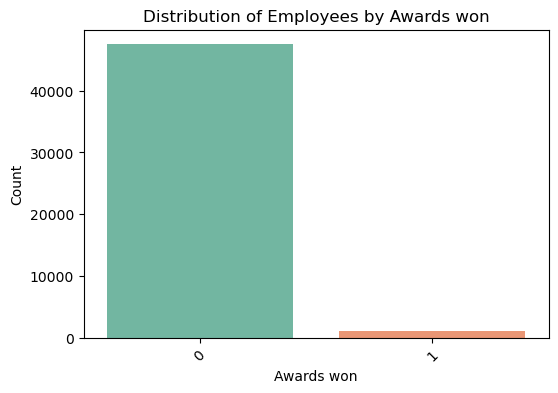

In [22]:
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='awards_won?', palette='Set2')
plt.xticks(rotation=45)
plt.xlabel('Awards won')
plt.ylabel('Count')
plt.title('Distribution of Employees by Awards won')
plt.show()

# Average training score

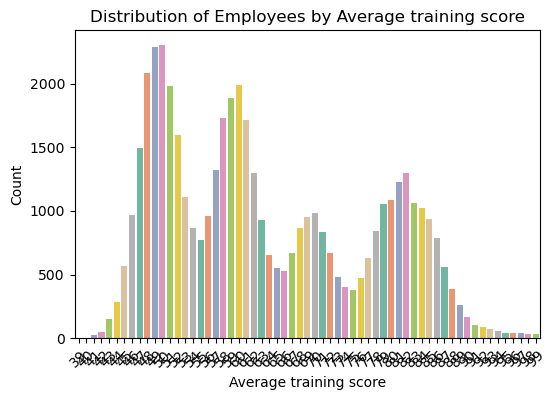

In [23]:
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='avg_training_score', palette='Set2')
plt.xticks(rotation=45)
plt.xlabel('Average training score')
plt.ylabel('Count')
plt.title('Distribution of Employees by Average training score')
plt.show()

# No of training

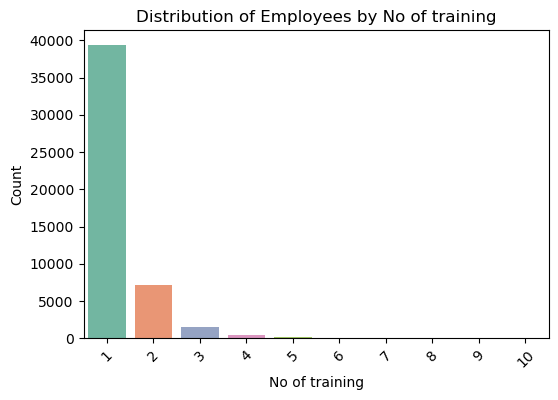

In [24]:
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='no_of_trainings', palette='Set2')
plt.xticks(rotation=45)
plt.xlabel('No of training')
plt.ylabel('Count')
plt.title('Distribution of Employees by No of training')
plt.show()

# KPIs_met >80%

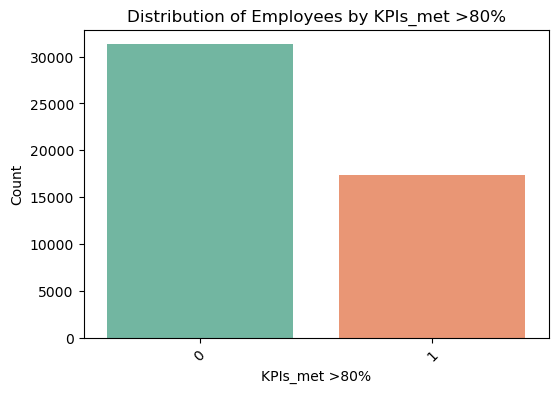

In [25]:
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='KPIs_met >80%', palette='Set2')
plt.xticks(rotation=45)
plt.xlabel('KPIs_met >80%')
plt.ylabel('Count')
plt.title('Distribution of Employees by KPIs_met >80%')
plt.show()

# Length of service

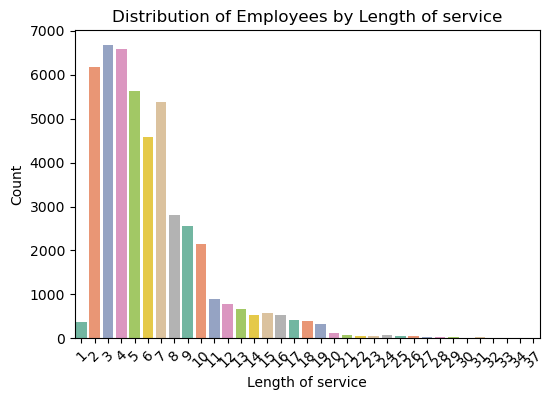

In [26]:
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='length_of_service', palette='Set2')
plt.xticks(rotation=45)
plt.xlabel('Length of service')
plt.ylabel('Count')
plt.title('Distribution of Employees by Length of service')
plt.show()

# Outliers 

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\DELL\anaconda3\l

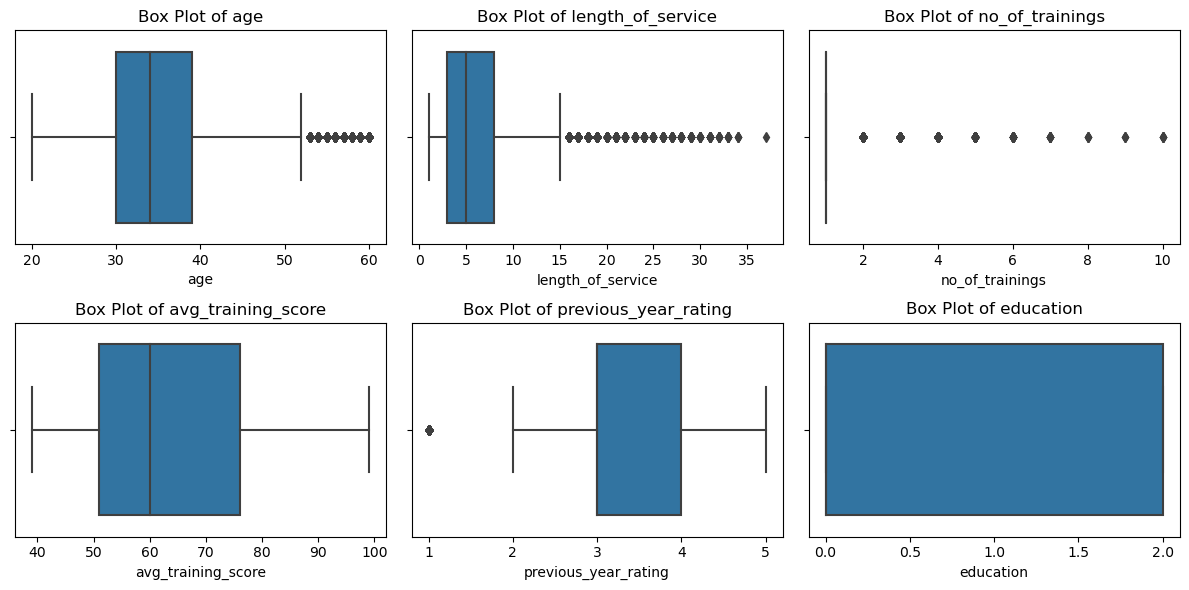

In [27]:
#Outlier checking 

import matplotlib.pyplot as plt
import seaborn as sns

numeric_columns = ['age', 'length_of_service', 'no_of_trainings', 'avg_training_score', 'previous_year_rating','education']
numeric_data = df[numeric_columns]

plt.figure(figsize=(12, 6))
plt.subplots_adjust(wspace=0.5)

for i, col in enumerate(numeric_columns):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x=numeric_data[col], orient='vertical')
    plt.title(f'Box Plot of {col}')

plt.tight_layout()
plt.show()

In [28]:
# Define a threshold for outlier removal 
threshold = 50

# Remove outliers for a specific column 
df = df[df['age'] >= threshold]

In [29]:
# Define a threshold for outlier removal 
threshold = 2

# Remove outliers for a specific column
df = df[df['previous_year_rating'] <= threshold]

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\DELL\anaconda3\l

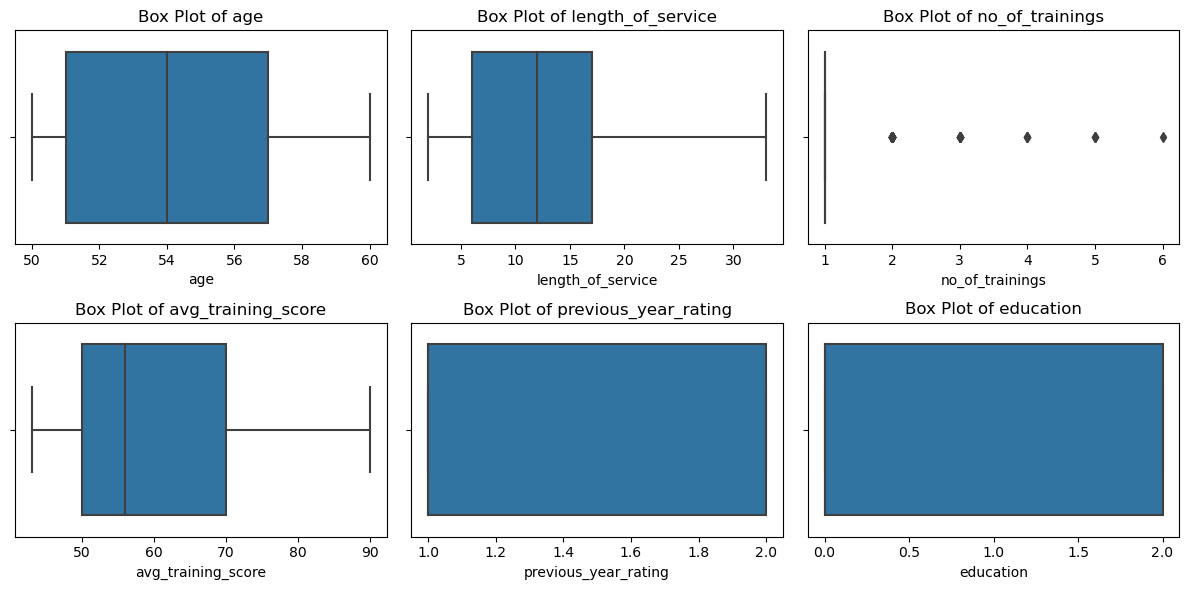

In [30]:
#Outlier checking 

import matplotlib.pyplot as plt
import seaborn as sns

numeric_columns = ['age', 'length_of_service', 'no_of_trainings', 'avg_training_score', 'previous_year_rating','education']
numeric_data = df[numeric_columns]

plt.figure(figsize=(12, 6))
plt.subplots_adjust(wspace=0.5)

for i, col in enumerate(numeric_columns):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x=numeric_data[col], orient='vertical')
    plt.title(f'Box Plot of {col}')

plt.tight_layout()
plt.show()

# Normalization

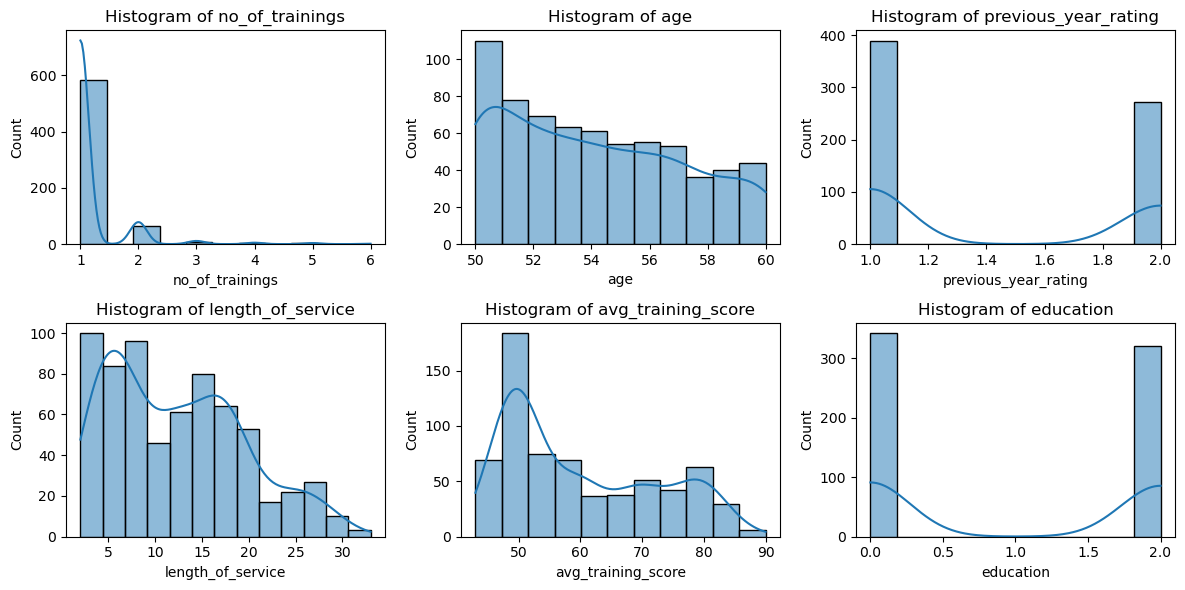

In [31]:
#check for normalization

import seaborn as sns
import matplotlib.pyplot as plt

# Subset the dataset to include only numeric columns
numeric_columns = ['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'avg_training_score','education']

# Create histograms
plt.figure(figsize=(12, 6))
plt.subplots_adjust(wspace=0.5)

for i, col in enumerate(numeric_columns):
    plt.subplot(2, 3, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')

plt.tight_layout()
plt.show()

In [32]:
summary_stats = df.describe()
print(summary_stats)

        employee_id  department      region   education      gender  \
count    663.000000  663.000000  663.000000  663.000000  663.000000   
mean   40097.190045    6.079940   12.903469    0.968326    0.677225   
std    22865.422146    1.811662    6.860921    1.000253    0.467891   
min       92.000000    0.000000    1.000000    0.000000    0.000000   
25%    20420.500000    5.000000   11.000000    0.000000    0.000000   
50%    40142.000000    7.000000   11.000000    0.000000    1.000000   
75%    59883.500000    7.000000   11.000000    2.000000    1.000000   
max    78292.000000    8.000000   31.000000    2.000000    1.000000   

       recruitment_channel  no_of_trainings         age  previous_year_rating  \
count           663.000000       663.000000  663.000000            663.000000   
mean              0.856712         1.165913   54.084465              1.411765   
std               0.990428         0.535379    3.183053              0.492525   
min               0.000000         1

# Divide target and features

In [33]:
#Define X and y

from sklearn.feature_selection import mutual_info_classif

X = df.drop(columns=["is_promoted","employee_id"])
y = df["is_promoted"]

In [34]:
print(X)
print(y)

       department  region  education  gender  recruitment_channel  \
307             5      11          2       0                    0   
314             0      11          2       1                    0   
493             5      11          2       0                    0   
646             8      11          2       0                    2   
777             7      31          0       1                    2   
...           ...     ...        ...     ...                  ...   
54351           8      11          0       1                    2   
54437           8      28          2       1                    2   
54628           7      11          0       1                    2   
54684           8      11          2       0                    2   
54777           8       4          0       1                    0   

       no_of_trainings  age  previous_year_rating  length_of_service  \
307                  1   58                   1.0                 13   
314                  1   50

In [35]:
print(X.shape)
print(y.shape)

(663, 12)
(663,)


# Handle imbalanced data

# Feature selection

In [36]:
# Calculate mutual information scores using scikit-learn's mutual_info_classif
mi_scores = mutual_info_classif(X, y, random_state=42)

# Create a pandas Series with feature names as indices
mi_scores_series = pd.Series(mi_scores, index=X.columns, name="MI Scores")

# Sort the Series in descending order
mi_scores_series = mi_scores_series.sort_values(ascending=False)

# Print the mutual information scores
print(mi_scores_series)

education               0.017013
previous_year_rating    0.011151
gender                  0.005683
KPIs_met >80%           0.005028
age                     0.004773
avg_training_score      0.001182
no_of_trainings         0.001073
length_of_service       0.000289
department              0.000000
region                  0.000000
recruitment_channel     0.000000
awards_won?             0.000000
Name: MI Scores, dtype: float64


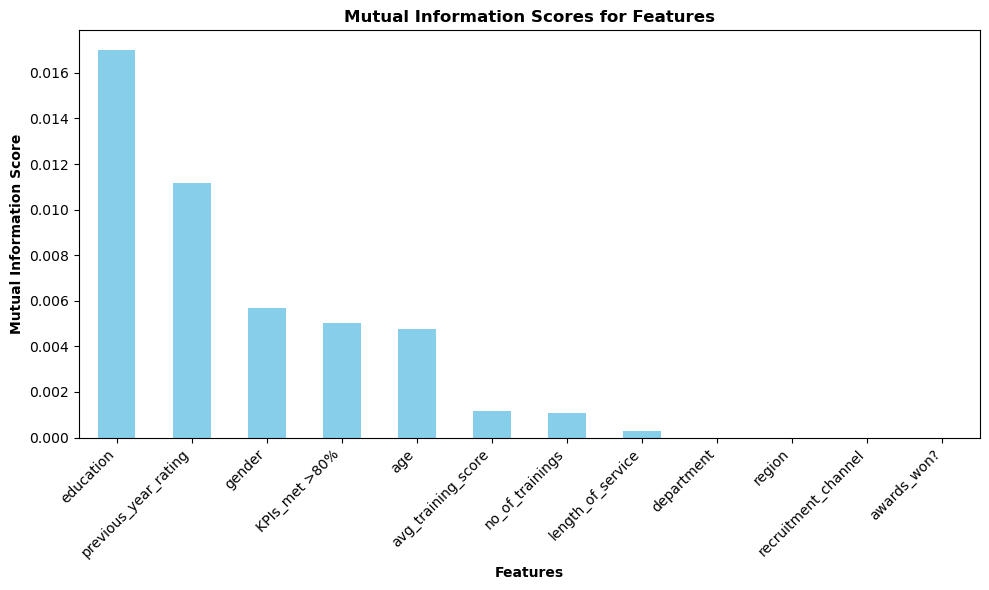

In [37]:
import matplotlib.pyplot as plt

# Plot the mutual information scores
plt.figure(figsize=(10, 6))
bar_plot = mi_scores_series.plot(kind='bar', color='skyblue')
plt.title("Mutual Information Scores for Features", fontweight='bold')  # Title in bold
plt.ylabel("Mutual Information Score", fontweight='bold')  # Y-axis label in bold
plt.xlabel("Features", fontweight='bold')  # X-axis label in bold
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()

# Feature extraction

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


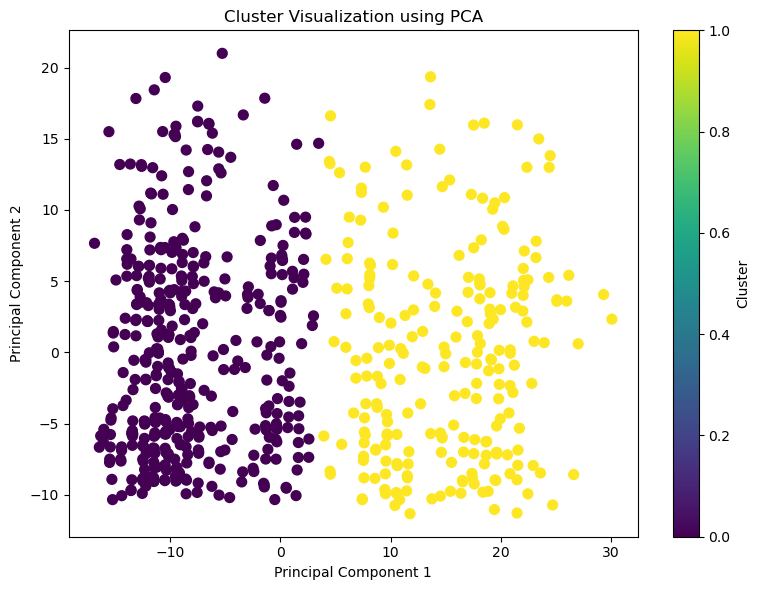

In [38]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assume X contains your features

# Apply PCA to reduce dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Assume you have already performed clustering and obtained cluster labels
# Here's an example using KMeans for clustering
kmeans = KMeans(n_clusters=2)  # Set the number of clusters
cluster_labels = kmeans.fit_predict(X)

# Visualize clusters in the reduced 2D space
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', s=50)
plt.title('Cluster Visualization using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.tight_layout()
plt.show()

# Correlation between features and target 

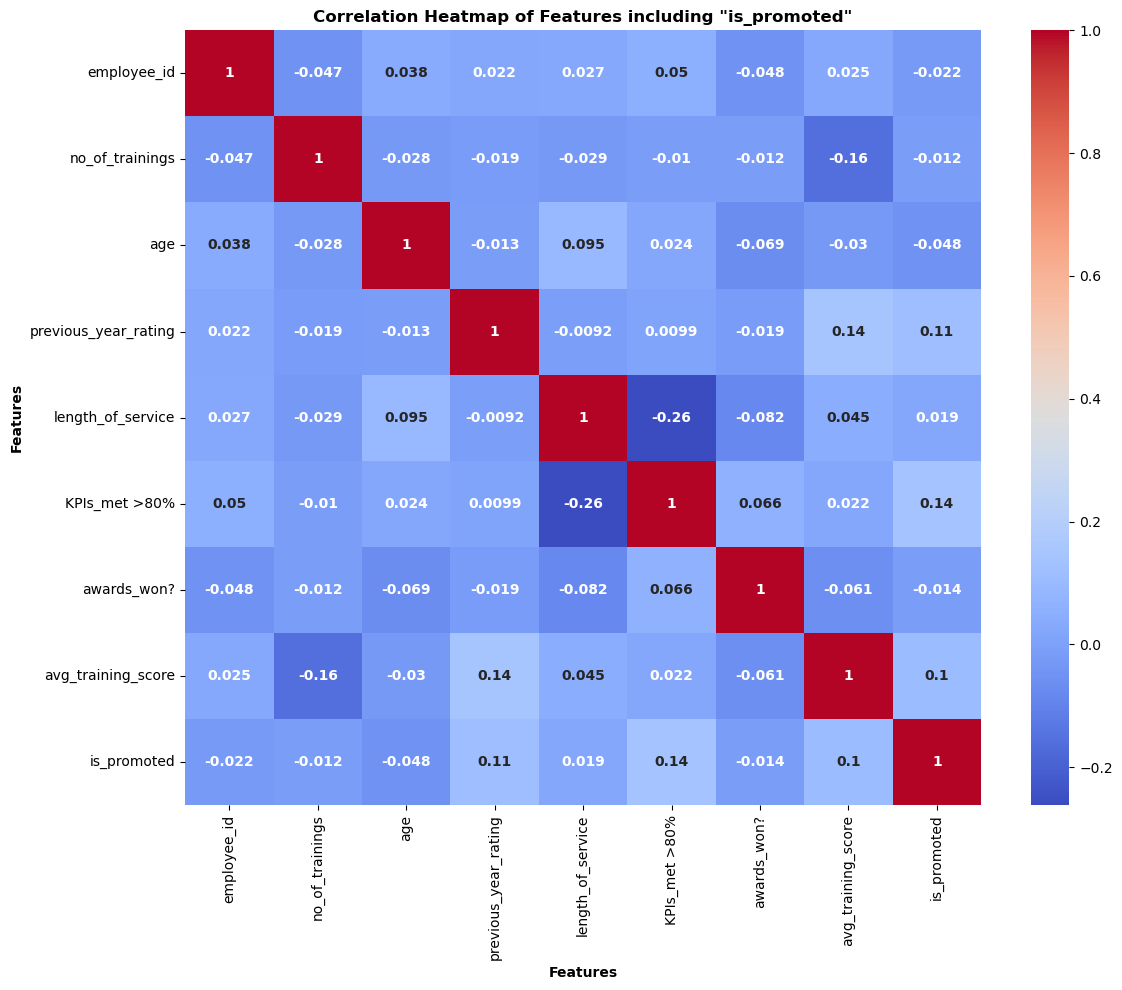

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' contains your dataset and 'is_promoted' is the target variable
# Dropping non-numeric columns if present
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap of the correlation matrix with bold values and axis labels
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', cbar=True,
            annot_kws={"weight": "bold", "size": 10})  # Set bold weight and text size for annotations
plt.title('Correlation Heatmap of Features including "is_promoted"', fontweight='bold')  # Bold title
plt.xlabel('Features', fontweight='bold')  # Bold x-axis label
plt.ylabel('Features', fontweight='bold')  # Bold y-axis label
plt.tight_layout()
plt.show()

# Drop features with 0 mi-score value

In [40]:
# Define the MI score threshold for feature selection
mi_threshold = 0 

# Select features with MI scores above the threshold
selected_features = mi_scores_series[mi_scores_series > mi_threshold].index.tolist()

# Create a new DataFrame with only the selected features
X_selected = X[selected_features]

X_selected

,education,previous_year_rating,gender,KPIs_met >80%,age,avg_training_score,no_of_trainings,length_of_service
307,2,1.0,0,0,58,70,1,13
314,2,1.0,1,0,50,79,1,7
493,2,1.0,0,0,50,68,1,16
646,2,2.0,0,0,56,79,1,16
777,0,2.0,1,0,60,48,1,12
...,...,...,...,...,...,...,...,...
54351,0,1.0,1,0,53,80,1,12
54437,2,2.0,1,0,54,74,1,3
54628,0,1.0,1,0,57,50,1,13
54684,2,1.0,0,0,50,75,1,3


# Load test data

In [41]:
# Load the dataset
df_test = pd.read_csv('test.csv')
df_test.head()

FileNotFoundError: [Errno 2] No such file or directory: 'test.csv'

In [ ]:
#Print the data shape (instances and attributes)
df_test.shape

In [ ]:
#Print the data info 
df_test.info()

In [ ]:
#Label Encode the columns which are non numeric
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

df_test['department'] = label_encoder.fit_transform(df_test['department'])
df_test['gender'] = label_encoder.fit_transform(df_test['gender'])
df_test['region'] = label_encoder.fit_transform(df_test['region'])
df_test['education'] = label_encoder.fit_transform(df_test['education'])
df_test['recruitment_channel'] = label_encoder.fit_transform(df_test['recruitment_channel'])

In [ ]:
df_test.head()

# Model building for prediction

# 1. SVM 

In [64]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Assume X_selected and y are defined

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build and Train the SVM Model
svm_model = SVC(kernel='linear', C=1.0, random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Make Predictions
y_pred_svm = svm_model.predict(X_test_scaled)

# Evaluate the Model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
classification_rep_svm = classification_report(y_test, y_pred_svm)

print(f'Accuracy: {accuracy_svm}')
print(f'Confusion Matrix:\n{conf_matrix_svm}')
print(f'Classification Report:\n{classification_rep_svm}')

# Hyperparameter Tuning with 10-fold Cross-Validation
param_grid = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf', 'poly'], 'gamma': ['scale', 'auto']}
grid_search = GridSearchCV(SVC(), param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Use the best model for predictions and evaluation
y_pred_tuned = best_model.predict(X_test_scaled)
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
# ... other evaluation metrics

print(f'Best Hyperparameters: {best_params}')
print(f'Accuracy with Tuned Model: {accuracy_tuned}')

# Additional: Cross-validation scores
cv_scores_svm = cross_val_score(best_model, X_train_scaled, y_train, cv=10, scoring='accuracy')
print(f'Cross-validation scores: {cv_scores_svm}')
print(f'Mean Cross-validation score: {np.mean(cv_scores_svm)}')


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_se

Accuracy: 0.9849624060150376
Confusion Matrix:
[[131   0]
 [  2   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       131
           1       0.00      0.00      0.00         2

    accuracy                           0.98       133
   macro avg       0.49      0.50      0.50       133
weighted avg       0.97      0.98      0.98       133

Best Hyperparameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Accuracy with Tuned Model: 0.9849624060150376
Cross-validation scores: [1.         1.         1.         0.98113208 0.98113208 0.98113208
 0.98113208 0.98113208 0.98113208 0.98113208]
Mean Cross-validation score: 0.9867924528301888


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(


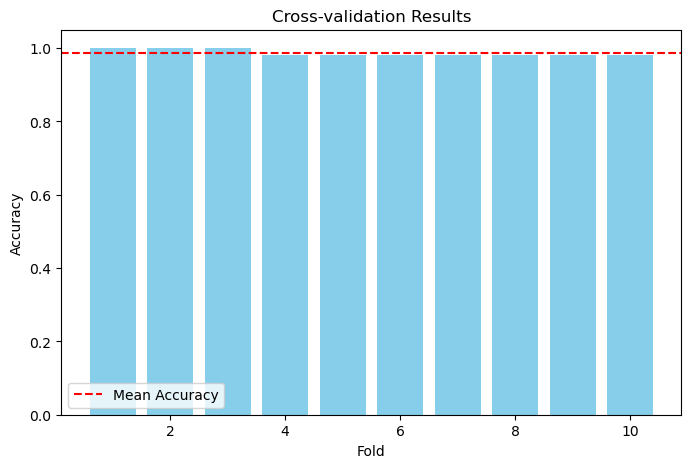

In [66]:
import matplotlib.pyplot as plt

# Plot cross-validation results
plt.figure(figsize=(8, 5))
plt.bar(range(1, 11), cv_scores_svm, color='skyblue')
plt.axhline(y=np.mean(cv_scores_svm), color='r', linestyle='--', label='Mean Accuracy')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross-validation Results')
plt.legend()
plt.show()


# 2. RF

In [67]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assume X_train, X_test, y_train, and y_test are defined

# Build and Train the Random Forest Model
rf_model = RandomForestClassifier(n_estimators=300, random_state=42)
rf_model.fit(X_train, y_train)

# Make Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)

print(f'Accuracy: {accuracy_rf}')
print(f'Confusion Matrix:\n{conf_matrix_rf}')
print(f'Classification Report:\n{classification_rep_rf}')

# Cross-validation
cv_scores_rf = cross_val_score(rf_model, X_train, y_train, cv=10, scoring='accuracy')
print(f'Cross-validation scores: {cv_scores_rf}')
print(f'Mean Cross-validation score: {np.mean(cv_scores_rf)}')


Accuracy: 0.9924812030075187
Confusion Matrix:
[[131   0]
 [  1   1]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       131
           1       1.00      0.50      0.67         2

    accuracy                           0.99       133
   macro avg       1.00      0.75      0.83       133
weighted avg       0.99      0.99      0.99       133



C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(


Cross-validation scores: [1.         1.         1.         0.98113208 0.98113208 0.98113208
 0.98113208 0.98113208 0.98113208 0.98113208]
Mean Cross-validation score: 0.9867924528301888


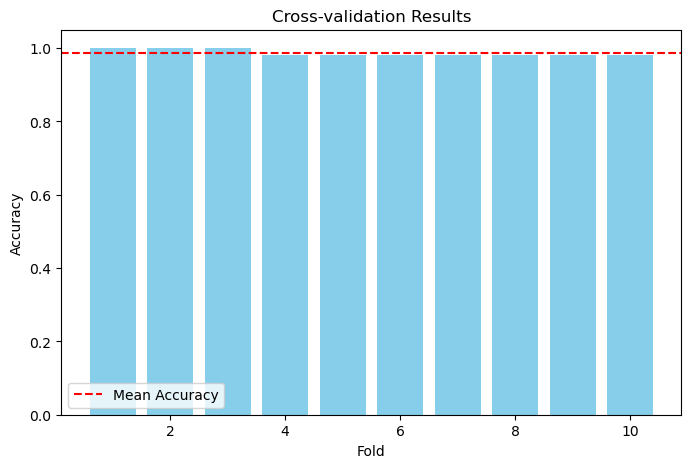

In [68]:
import matplotlib.pyplot as plt

# Plot cross-validation results
plt.figure(figsize=(8, 5))
plt.bar(range(1, 11), cv_scores_rf, color='skyblue')
plt.axhline(y=np.mean(cv_scores_rf), color='r', linestyle='--', label='Mean Accuracy')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross-validation Results')
plt.legend()
plt.show()


# 3. K-NN

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\si

Best k value: 3
Best Cross-validated Accuracy: 0.9867924528301888


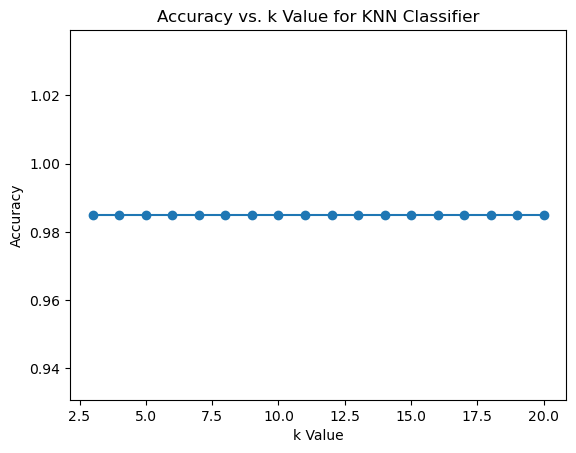

Accuracy with Best k Value: 0.9849624060150376
Confusion Matrix:
[[131   0]
 [  2   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       131
           1       0.00      0.00      0.00         2

    accuracy                           0.98       133
   macro avg       0.49      0.50      0.50       133
weighted avg       0.97      0.98      0.98       133



C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [58]:
import numpy as np
from sklearn.model_selection import cross_val_score

# Assume X_train, X_test, y_train, y_test are defined

# Find the best k value
best_k = 3
best_accuracy = 0

# Try different values of k
for k in range(3, 21):
    # Create a KNN classifier with the current k value
    knn_classifier = KNeighborsClassifier(n_neighbors=k)

    # Perform 10-fold cross-validation
    cv_scores = cross_val_score(knn_classifier, X_train, y_train, cv=10, scoring='accuracy')
    mean_cv_score = np.mean(cv_scores)

    # Update best_k and best_accuracy if the current k gives a higher cross-validated accuracy
    if mean_cv_score > best_accuracy:
        best_k = k
        best_accuracy = mean_cv_score

# Print the best k value and corresponding cross-validated accuracy
print(f'Best k value: {best_k}')
print(f'Best Cross-validated Accuracy: {best_accuracy}')

# Plot the graph for different k values and accuracy
k_values = range(3, 21)
accuracy_values = []

for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train, y_train)
    y_pred_knn = knn_classifier.predict(X_test)
    accuracy_knn = accuracy_score(y_test, y_pred_knn)
    accuracy_values.append(accuracy_knn)

# Plotting the graph
plt.plot(k_values, accuracy_values, marker='o')
plt.title('Accuracy vs. k Value for KNN Classifier')
plt.xlabel('k Value')
plt.ylabel('Accuracy')
plt.show()

# Use the best k value for the final model
best_knn_classifier = KNeighborsClassifier(n_neighbors=best_k)
best_knn_classifier.fit(X_train, y_train)

# Make predictions on the testing data with the best model
y_pred_best_knn = best_knn_classifier.predict(X_test)

# Evaluate the best model
accuracy_best_knn = accuracy_score(y_test, y_pred_best_knn)
conf_matrix_best_knn = confusion_matrix(y_test, y_pred_best_knn)
classification_rep_best_knn = classification_report(y_test, y_pred_best_knn)

print(f'Accuracy with Best k Value: {accuracy_best_knn}')
print(f'Confusion Matrix:\n{conf_matrix_best_knn}')
print(f'Classification Report:\n{classification_rep_best_knn}')


# 4. Naive bayes 

In [69]:
from sklearn.model_selection import cross_val_score

# Assume X_train, X_test, y_train, y_test are defined

# Create a Gaussian Naive Bayes classifier
naive_bayes_classifier = GaussianNB()

# Fit the classifier on the training data
naive_bayes_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_nb = naive_bayes_classifier.predict(X_test)

# Calculate and print the accuracy of the classifier
accuracy_nb = accuracy_score(y_test, y_pred_nb)
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
classification_rep_nb = classification_report(y_test, y_pred_nb)

print(f'Accuracy: {accuracy_nb}')
print(f'Confusion Matrix:\n{conf_matrix_nb}')
print(f'Classification Report:\n{classification_rep_nb}')

# 10-fold cross-validation
cv_scores_nb = cross_val_score(naive_bayes_classifier, X_train, y_train, cv=10, scoring='accuracy')
print(f'Cross-validation scores: {cv_scores_nb}')
print(f'Mean Cross-validation score: {np.mean(cv_scores_nb)}')


Accuracy: 0.6917293233082706
Confusion Matrix:
[[91 40]
 [ 1  1]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.69      0.82       131
           1       0.02      0.50      0.05         2

    accuracy                           0.69       133
   macro avg       0.51      0.60      0.43       133
weighted avg       0.97      0.69      0.80       133

Cross-validation scores: [0.75471698 0.58490566 0.62264151 0.73584906 0.58490566 0.79245283
 0.73584906 0.64150943 0.75471698 0.88679245]
Mean Cross-validation score: 0.709433962264151


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(


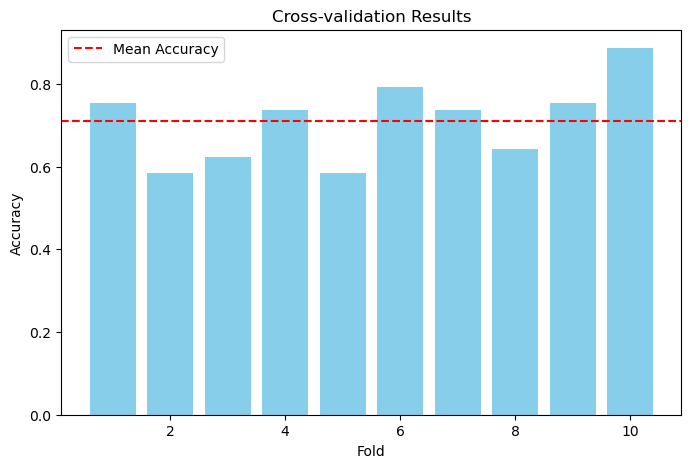

In [70]:
import matplotlib.pyplot as plt

# Plot cross-validation results
plt.figure(figsize=(8, 5))
plt.bar(range(1, 11), cv_scores_nb, color='skyblue')
plt.axhline(y=np.mean(cv_scores_nb), color='r', linestyle='--', label='Mean Accuracy')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross-validation Results')
plt.legend()
plt.show()


# 5. Decision tree

In [71]:
from sklearn.model_selection import cross_val_score

# Assume X_train, X_test, y_train, y_test are defined

# Create a Decision Tree classifier
decision_tree_classifier = DecisionTreeClassifier(random_state=42)

# Fit the classifier on the training data
decision_tree_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_dt = decision_tree_classifier.predict(X_test)

# Calculate and print the accuracy of the classifier
accuracy_dt = accuracy_score(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
classification_rep_dt = classification_report(y_test, y_pred_dt)

print(f'Accuracy: {accuracy_dt}')
print(f'Confusion Matrix:\n{conf_matrix_dt}')
print(f'Classification Report:\n{classification_rep_dt}')

# 10-fold cross-validation
cv_scores_dt = cross_val_score(decision_tree_classifier, X_train, y_train, cv=10, scoring='accuracy')
print(f'Cross-validation scores: {cv_scores_dt}')
print(f'Mean Cross-validation score: {np.mean(cv_scores_dt)}')


Accuracy: 0.9849624060150376
Confusion Matrix:
[[130   1]
 [  1   1]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       131
           1       0.50      0.50      0.50         2

    accuracy                           0.98       133
   macro avg       0.75      0.75      0.75       133
weighted avg       0.98      0.98      0.98       133

Cross-validation scores: [0.98113208 0.96226415 0.98113208 0.98113208 0.96226415 0.98113208
 0.96226415 1.         0.96226415 0.96226415]
Mean Cross-validation score: 0.9735849056603773


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(


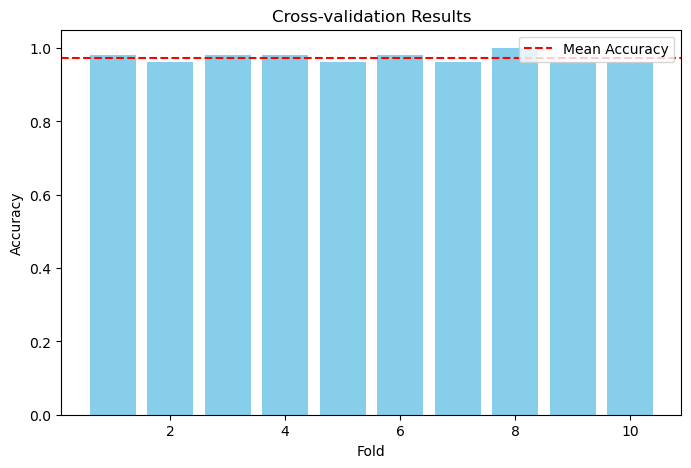

In [73]:
import matplotlib.pyplot as plt

# Plot cross-validation results
plt.figure(figsize=(8, 5))
plt.bar(range(1, 11), cv_scores_dt, color='skyblue')
plt.axhline(y=np.mean(cv_scores_dt), color='r', linestyle='--', label='Mean Accuracy')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross-validation Results')
plt.legend()
plt.show()


# 6. Logistic regression

In [74]:
from sklearn.model_selection import cross_val_score

# Assume X_train, X_test, y_train, y_test are defined

# Create a Logistic Regression classifier
logistic_regression_classifier = LogisticRegression(random_state=42)

# Fit the classifier on the training data
logistic_regression_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_lr = logistic_regression_classifier.predict(X_test)

# Calculate and print the accuracy of the classifier
accuracy_lr = accuracy_score(y_test, y_pred_lr)
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
classification_rep_lr = classification_report(y_test, y_pred_lr)

print(f'Accuracy: {accuracy_lr}')
print(f'Confusion Matrix:\n{conf_matrix_lr}')
print(f'Classification Report:\n{classification_rep_lr}')

# 10-fold cross-validation
cv_scores_lr = cross_val_score(logistic_regression_classifier, X_train, y_train, cv=10, scoring='accuracy')
print(f'Cross-validation scores: {cv_scores_lr}')
print(f'Mean Cross-validation score: {np.mean(cv_scores_lr)}')


Accuracy: 0.9849624060150376
Confusion Matrix:
[[131   0]
 [  2   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       131
           1       0.00      0.00      0.00         2

    accuracy                           0.98       133
   macro avg       0.49      0.50      0.50       133
weighted avg       0.97      0.98      0.98       133

Cross-validation scores: [1.         1.         1.         0.98113208 0.98113208 0.98113208
 0.98113208 0.98113208 0.98113208 0.98113208]
Mean Cross-validation score: 0.9867924528301888


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_se

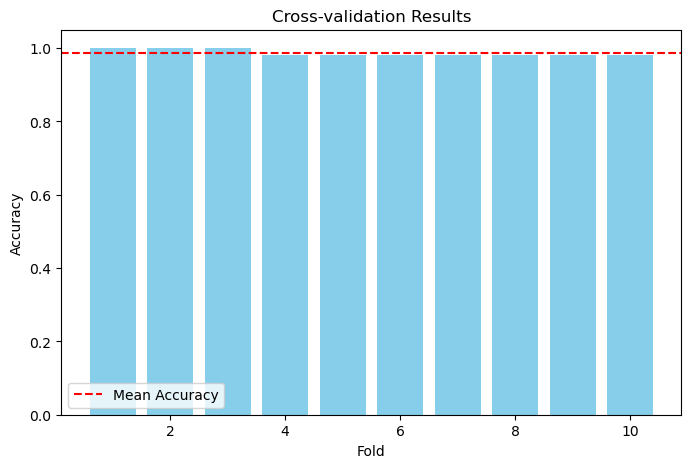

In [75]:
import matplotlib.pyplot as plt

# Plot cross-validation results
plt.figure(figsize=(8, 5))
plt.bar(range(1, 11), cv_scores_lr, color='skyblue')
plt.axhline(y=np.mean(cv_scores_lr), color='r', linestyle='--', label='Mean Accuracy')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross-validation Results')
plt.legend()
plt.show()


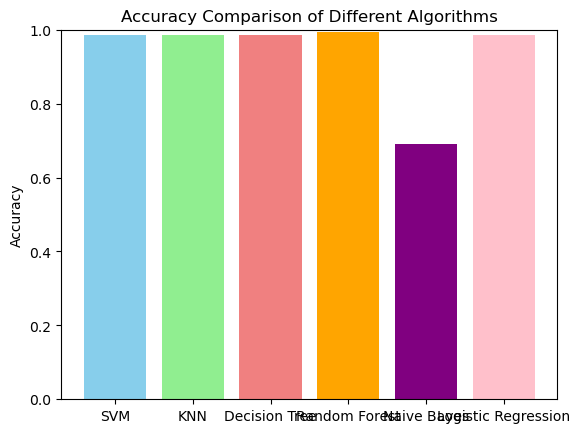

In [76]:
import matplotlib.pyplot as plt

# Assuming you have accuracy values for each algorithm
algorithm_names = ['SVM', 'KNN', 'Decision Tree', 'Random Forest', 'Naive Bayes', 'Logistic Regression']
accuracy_values = [accuracy_svm, accuracy_knn, accuracy_dt, accuracy_rf, accuracy_nb, accuracy_lr]

# Plotting the bar chart
plt.bar(algorithm_names, accuracy_values, color=['skyblue', 'lightgreen', 'lightcoral', 'orange', 'purple', 'pink'])
plt.ylim([0, 1])  # Set the y-axis limit based on your accuracy range
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Different Algorithms')
plt.show()
